In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter

# CDG-JFK cleaning and analysis

In [176]:
df = pd.read_csv('CDG-JFK.csv')
print(df.head())


                                              PK_FLD SCRAPE_DATE  \
0  ONE_WAY-JFK-CDG-2024/05/13-1_N0302-ECONOMY-nan...  2024-05-13   
1  ONE_WAY-JFK-CDG-2024/05/13-1_AA44-ECONOMY-nan-...  2024-05-13   
2  ONE_WAY-JFK-CDG-2024/05/13-1_AY5810-ECONOMY-na...  2024-05-13   
3  ONE_WAY-JFK-CDG-2024/05/13-1_IB4158-ECONOMY-na...  2024-05-13   
4  ONE_WAY-JFK-CDG-2024/05/13-1_BA1534-ECONOMY-na...  2024-05-13   

                   TASK_KEY IDENTIFIER TRIP_TYPE   PRICE CURRENCY  \
0  US-inter_JFK-CDG_airline    1_N0302   ONE_WAY  405.50      USD   
1  US-inter_JFK-CDG_airline     1_AA44   ONE_WAY  464.34      USD   
2  US-inter_JFK-CDG_airline   1_AY5810   ONE_WAY  476.40      USD   
3  US-inter_JFK-CDG_airline   1_IB4158   ONE_WAY  478.82      USD   
4  US-inter_JFK-CDG_airline   1_BA1534   ONE_WAY  481.47      USD   

  DEPATURE_CITY ARRIVIAL_CITY              DEPATURE_TIME  ... LEG_2_MINUTE  \
0           JFK           CDG  2024-06-13 00:30:00.000 Z  ...            0   
1           JFK     

# cleaning the data

In [51]:
# Rename the mispelled columns
df = df.rename(columns={'DEPATURE_TIME': 'DEPARTURE_DATETIME', 'ARRIVIAL_TIME': 'ARRIVAL_DATETIME'})

#convert departure and arrival time columns to datetime format
df['DEPARTURE_DATETIME']= pd.to_datetime(df['DEPARTURE_DATETIME'])
df['ARRIVAL_DATETIME']= pd.to_datetime(df['ARRIVAL_DATETIME'])

#Split departure datetime into departure date and departure time columns
df['DEPARTURE_DATE'] = df['DEPARTURE_DATETIME'].dt.date
df['DEPARTURE_TIME'] = df['DEPARTURE_DATETIME'].dt.time

#Split arrival datetime into arrival date and arrival time columns
df['ARRIVAL_DATE'] = df['ARRIVAL_DATETIME'].dt.date
df['ARRIVAL_TIME'] = df['ARRIVAL_DATETIME'].dt.time

print(df.head())

                                              PK_FLD SCRAPE_DATE  \
0  ONE_WAY-JFK-CDG-2024/05/13-1_N0302-ECONOMY-nan...  2024-05-13   
1  ONE_WAY-JFK-CDG-2024/05/13-1_AA44-ECONOMY-nan-...  2024-05-13   
2  ONE_WAY-JFK-CDG-2024/05/13-1_AY5810-ECONOMY-na...  2024-05-13   
3  ONE_WAY-JFK-CDG-2024/05/13-1_IB4158-ECONOMY-na...  2024-05-13   
4  ONE_WAY-JFK-CDG-2024/05/13-1_BA1534-ECONOMY-na...  2024-05-13   

                   TASK_KEY IDENTIFIER TRIP_TYPE   PRICE CURRENCY  \
0  US-inter_JFK-CDG_airline    1_N0302   ONE_WAY  405.50      USD   
1  US-inter_JFK-CDG_airline     1_AA44   ONE_WAY  464.34      USD   
2  US-inter_JFK-CDG_airline   1_AY5810   ONE_WAY  476.40      USD   
3  US-inter_JFK-CDG_airline   1_IB4158   ONE_WAY  478.82      USD   
4  US-inter_JFK-CDG_airline   1_BA1534   ONE_WAY  481.47      USD   

  DEPATURE_CITY ARRIVIAL_CITY        DEPARTURE_DATETIME  ... LEG_3_MINUTE  \
0           JFK           CDG 2024-06-13 00:30:00+00:00  ...          NaN   
1           JFK       

# Q1A Exploratory data analysis

In [ ]:
#check how many duplicates there are in the PK_FLD 
#this helps us check whether we have multiple rows for the same flight
df.duplicated(subset='PK_FLD').sum()


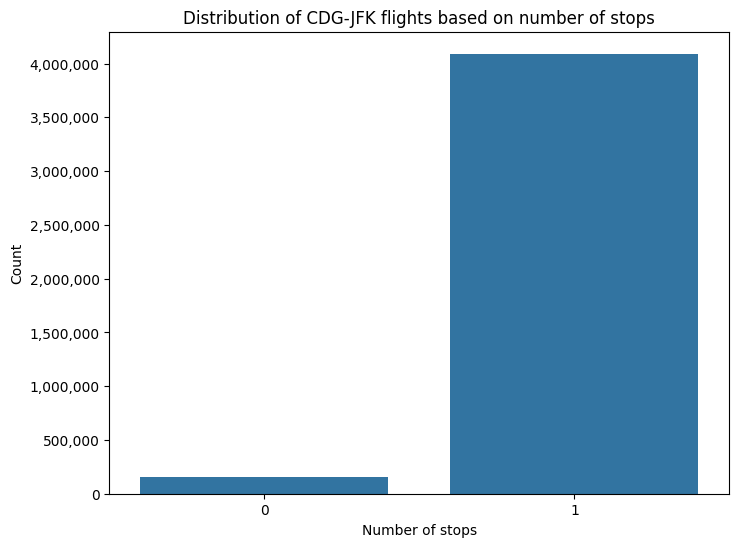

In [ ]:
#Create a countplot using on trip types

plt.figure(figsize= (8,6))
sns.countplot(data=df, x='STOPS')
plt.title('Distribution of CDG-JFK flights based on number of stops')
plt.xlabel('Number of stops')
plt.ylabel('Count')
formatter = FuncFormatter(lambda x, _: format(int(x), ','))
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

In [ ]:
#check distribution of flight inventory between cabins
plt.figure(figsize= (8,6))  
sns.countplot(data=df, x='LEG_1_CABIN')
plt.title('Distribution of CDG-JFK flights based on class')
plt.xlabel('Cabin')
plt.ylabel('Count')
formatter = FuncFormatter(lambda x, _: format(int(x), ','))
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

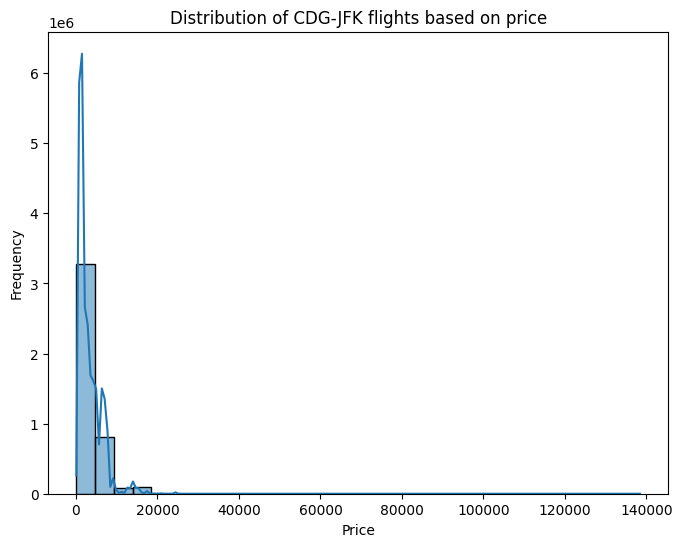

In [ ]:
#Check distribution of prices
plt.figure(figsize= (8,6))  
sns.histplot(data=df, x='PRICE',bins=30, kde=True)
plt.title('Distribution of CDG-JFK flights based on price')
plt.xlabel('Price') 
plt.ylabel('Frequency')
formatter = FuncFormatter(lambda x, _: format(int(x), ','))
plt.gca().yaxis.set_major_formatter(formatter)
plt.show

In [ ]:
# since the chart shows the outliers, theyre to be removed for a more useful view

#Calculate the interquartile range (IQR) for the price column
q1 = df['PRICE'].quantile(0.25)
q3 = df['PRICE'].quantile(0.75)
iqr = q3 - q1
print(iqr)

#define the lower and upper bounds for outliers
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(lower_bound)
print(upper_bound)

#filter out outliers from the data
filter_df = df[(df['PRICE'] >= lower_bound) & (df['PRICE'] <= upper_bound)]

#create a new chart without outliers
plt.figure(figsize= (8,6))  
sns.histplot(data=filter_df, x='PRICE',bins=30, kde=True)
plt.title('Distribution of CDG-JFK flights based on price')
plt.xlabel('Price in USD') 
plt.ylabel('Frequency')
formatter = FuncFormatter(lambda x, _: format(int(x), ','))
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

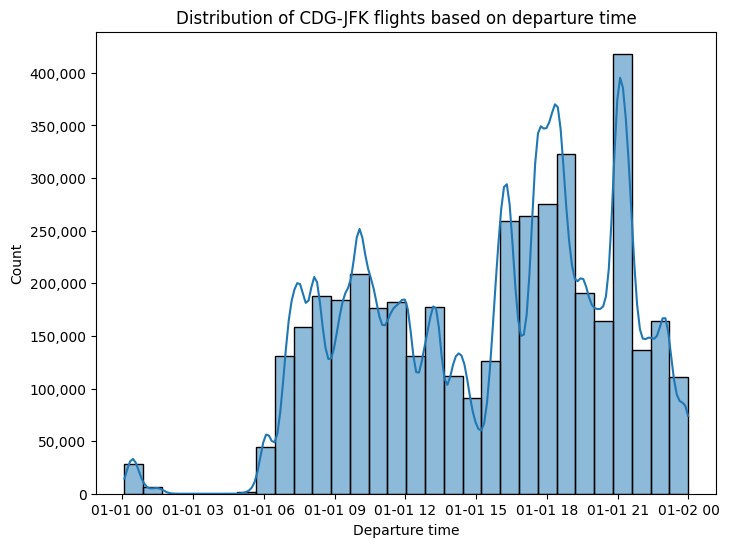

In [66]:
# Convert the 'DEPARTURE_TIME' column to a datetime object

df['DEPARTURE_TIME'] = pd.to_datetime(df['DEPARTURE_TIME'], format='%H:%M')

#create a chart showing distribution of departure times
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='DEPARTURE_TIME', bins=30, kde=True)
plt.title('Distribution of CDG-JFK flights based on departure time')
plt.xlabel('Departure time')
plt.ylabel('Count')
formatter = FuncFormatter(lambda x, _: format(int(x), ','))
plt.gca().yaxis.set_major_formatter(formatter)


plt.show()


# Q1A Pricing analysis
## prices over time

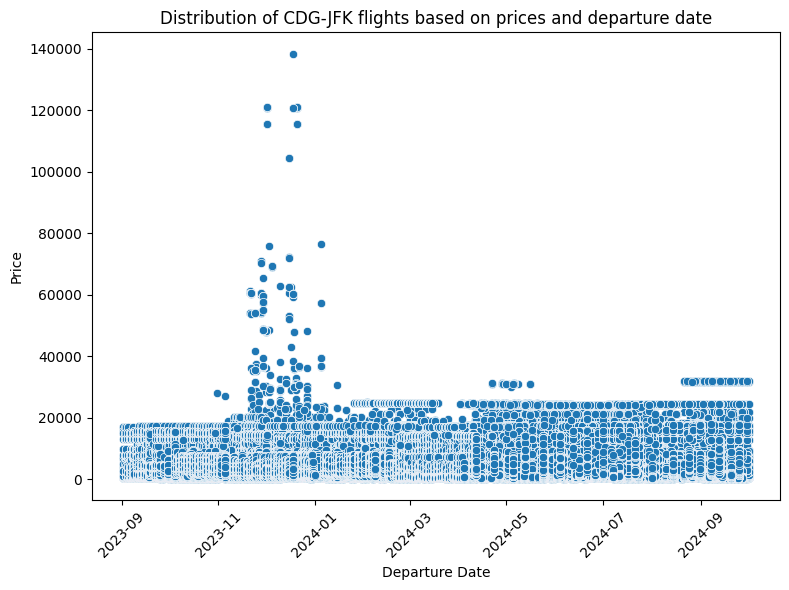

In [157]:
# Convert the 'DEPARTURE_DATE' column to a datetime object
df['DEPARTURE_DATE'] = pd.to_datetime(df['DEPARTURE_DATE'])

# Create a scatter plot using Seaborn to show the distribution of ticket prices based on departure date
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='DEPARTURE_DATE', y='PRICE')
plt.title('Distribution of CDG-JFK flights based on prices and departure date')
plt.xlabel('Departure Date')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

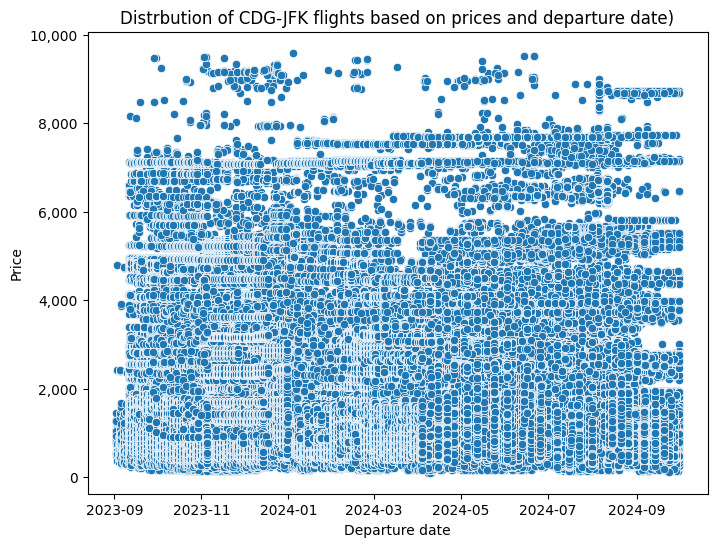

In [158]:
#scatter plot: price and date
#not too helpful, maybe remove this part
#Convert the Departure date column to a datetime object
df['DEPARTURE_DATE'] = pd.to_datetime(df['DEPARTURE_DATE'])

# Remove outliers from the data
Q1 = df['PRICE'].quantile(0.25)
Q3 = df['PRICE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_df = df[(df['PRICE'] >= lower_bound) & (df['PRICE'] <= upper_bound) & (df['LEG_1_CABIN'] == 'ECONOMY')]

#Create a scatter plot to show the distribution of ticket prices based on departure date 

plt.figure(figsize=(8,6))
sns.scatterplot(data=filtered_df, x='DEPARTURE_DATE', y='PRICE')
plt.title('Distrbution of CDG-JFK flights based on prices and departure date)')
plt.xlabel('Departure date')
plt.ylabel('Price') 
formatter = FuncFormatter(lambda x, _: format(int(x), ',')) 
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

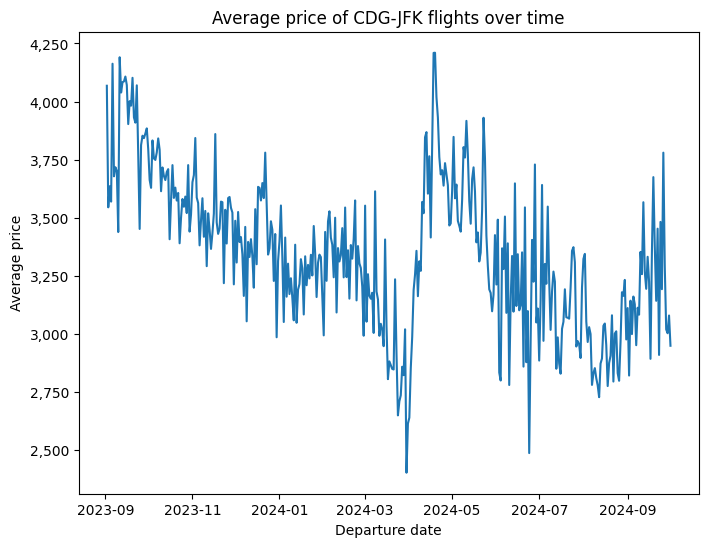

In [159]:
# Average price by date 
# Convert 'DEPARTURE_DATE' column to a datetime object
df['DEPARTURE_DATE'] = pd.to_datetime(df['DEPARTURE_DATE'])

# Calculate the average price for each departure date
average_prices = df.groupby('DEPARTURE_DATE')['PRICE'].mean().reset_index()

# Create a line chart to show the average price over time
plt.figure(figsize=(8, 6))
sns.lineplot(data=average_prices, x='DEPARTURE_DATE', y='PRICE')
plt.title('Average price of CDG-JFK flights over time')
plt.xlabel('Departure date')
plt.ylabel('Average price')
formatter = FuncFormatter(lambda x, _: format(int(x), ','))
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()


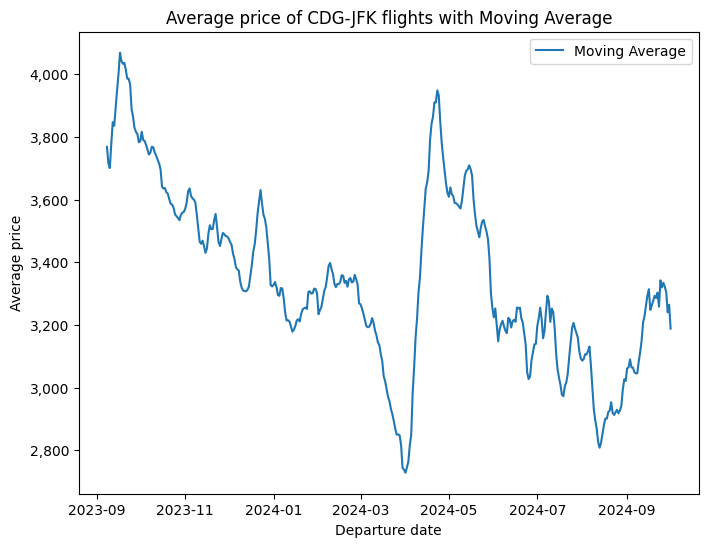

In [160]:
#7 day moving average price by date
# Calculate the moving average with a window size of 3
average_prices['MA_PRICE'] = average_prices['PRICE'].rolling(window=7).mean()

# Create a line chart with the moving average
plt.figure(figsize=(8, 6))
sns.lineplot(data=average_prices, x='DEPARTURE_DATE', y='MA_PRICE', label='Moving Average')
plt.title('Average price of CDG-JFK flights with Moving Average')
plt.xlabel('Departure date')
plt.ylabel('Average price')
formatter = FuncFormatter(lambda x, _: format(int(x), ','))
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend()
plt.show()

## average prices by airline - direct flights

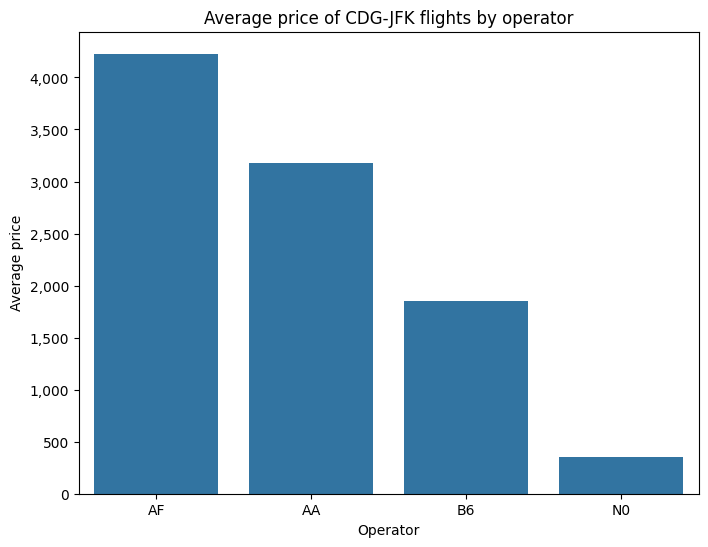

In [161]:
#filter flights to show non-stop flights only
filtered_df = df[df['STOPS'] == 0]

#calculate the average price by leg_1_operator
average_prices_by_operator = filtered_df.groupby('LEG_1_FLIGHT_OPEATOR')['PRICE'].mean().reset_index()

#rank the operators by average price in the chart
average_prices_by_operator = average_prices_by_operator.sort_values(by='PRICE', ascending=False)

# Create a bar chart to show the average price by operator
plt.figure(figsize=(8, 6))
sns.barplot(data=average_prices_by_operator, x='LEG_1_FLIGHT_OPEATOR', y='PRICE')
plt.title('Average price of CDG-JFK flights by operator')
plt.xlabel('Operator')
plt.ylabel('Average price')
formatter = FuncFormatter(lambda x, _: format(int(x), ','))
plt.gca().yaxis.set_major_formatter(formatter)



plt.show()

#average prices by airline, direct flights, split by cabin 

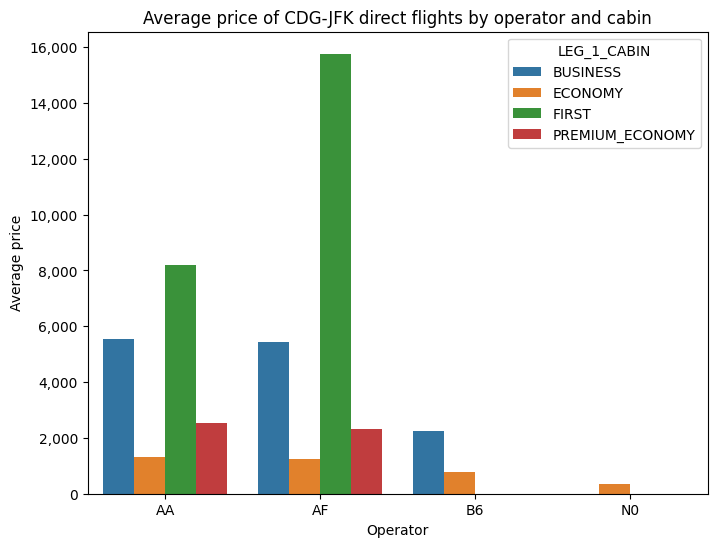

In [162]:
#filter flights to show non-stop flights only
filtered_df = df[df['STOPS'] == 0]

#Calculate the average price per cabin per operator  
average_prices_by_operator = filtered_df.groupby(['LEG_1_FLIGHT_OPEATOR', 'LEG_1_CABIN'])['PRICE'].mean().reset_index()

#Create a clustered bar chart to show price per cabin per operator
plt.figure(figsize=(8, 6))
sns.barplot(data=average_prices_by_operator, x='LEG_1_FLIGHT_OPEATOR', y='PRICE', hue='LEG_1_CABIN')
plt.title('Average price of CDG-JFK direct flights by operator and cabin')
plt.xlabel('Operator')  
plt.ylabel('Average price')
formatter = FuncFormatter(lambda x, _: format(int(x), ','))
plt.gca().yaxis.set_major_formatter(formatter)


#rank the operators by average price in the chart
average_prices_by_operator = average_prices_by_operator.sort_values(by='PRICE', ascending=False)

plt.show()

## average prices by operator, with 1 or more stops (Review this before submission)

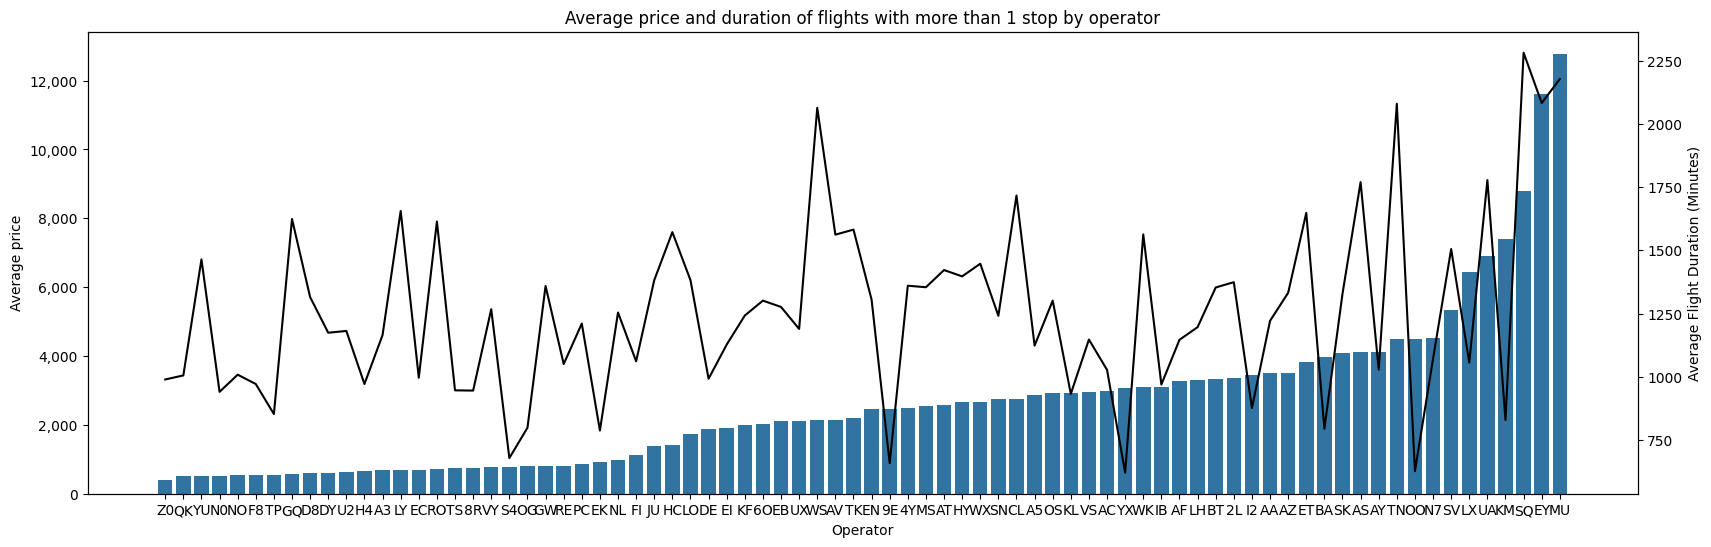

In [163]:
# Filter flights to show with more than 1 stop
filtered_df = df[df['STOPS'] >= 1]

# Calculate the average price by leg_1_operator
average_prices_by_operator = filtered_df.groupby('LEG_1_FLIGHT_OPEATOR')['PRICE'].mean().reset_index()

# Sort the operators by average price in ascending order
average_prices_by_operator = average_prices_by_operator.sort_values(by='PRICE')

# Calculate the average travel duration by operator
average_minutes_by_operator = filtered_df.groupby('LEG_1_FLIGHT_OPEATOR')['TOTAL_MINUTE'].mean().reset_index()
average_minutes_by_operator['LEG_1_FLIGHT_DURATION'] = average_minutes_by_operator['TOTAL_MINUTE'].astype(int)

# Create a new figure
plt.figure(figsize=(20, 6))

# Create the bar chart to show the average price by operator
ax1 = plt.gca()
sns.barplot(data=average_prices_by_operator, x='LEG_1_FLIGHT_OPEATOR', y='PRICE', ax=ax1)
ax1.set_title('Average price and duration of flights with more than 1 stop by operator')
ax1.set_xlabel('Operator')
ax1.set_ylabel('Average price')
formatter = FuncFormatter(lambda x, _: format(int(x), ','))
ax1.yaxis.set_major_formatter(formatter)

# Create a secondary y-axis for the travel duration
ax2 = ax1.twinx()
sns.lineplot(data=average_minutes_by_operator, x='LEG_1_FLIGHT_OPEATOR', y='LEG_1_FLIGHT_DURATION', color='black', ax=ax2)
ax2.set_ylabel('Average Flight Duration (Minutes)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## Understanding relationship between travel duration and price - no correlation

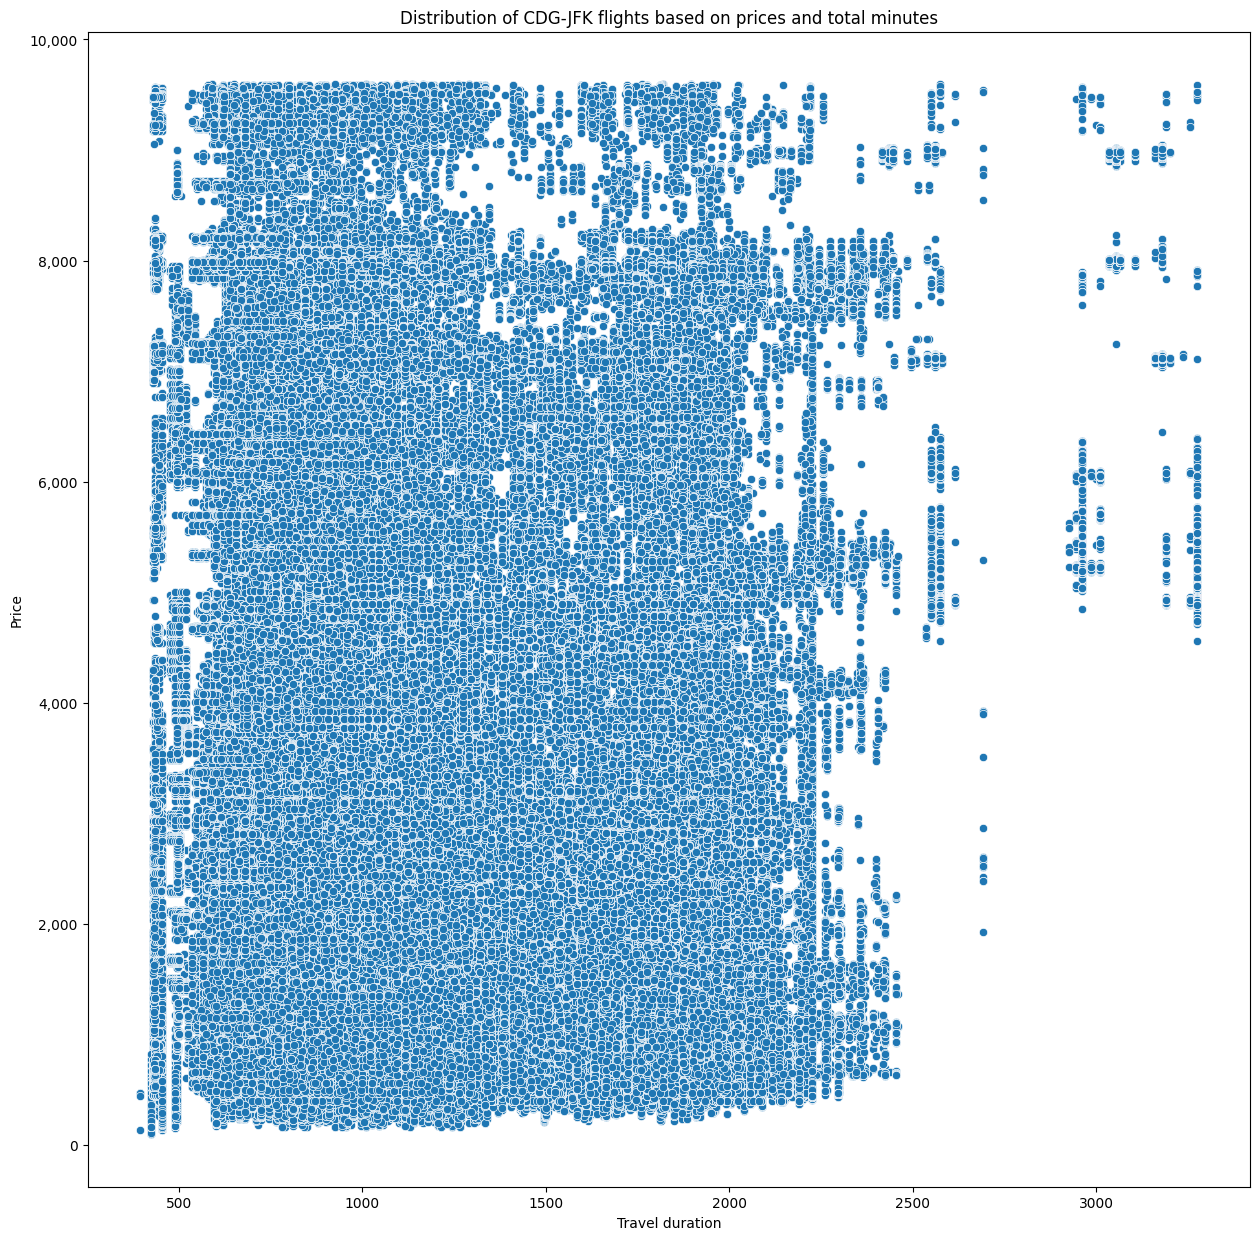

In [164]:
# Remove outliers from the data
Q1 = df['PRICE'].quantile(0.25)
Q3 = df['PRICE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_df = df[(df['PRICE'] >= lower_bound) & (df['PRICE'] <= upper_bound)]

#create a scatter plot to show distribution of price and total_minutes
plt.figure(figsize=(15,15))   
sns.scatterplot(data=filtered_df, x='TOTAL_MINUTE', y='PRICE')
plt.title('Distribution of CDG-JFK flights based on prices and total minutes')
plt.xlabel('Travel duration')
plt.ylabel('Price')
formatter = FuncFormatter(lambda x, _: format(int(x), ','))
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

## number of stops and their implication on prices

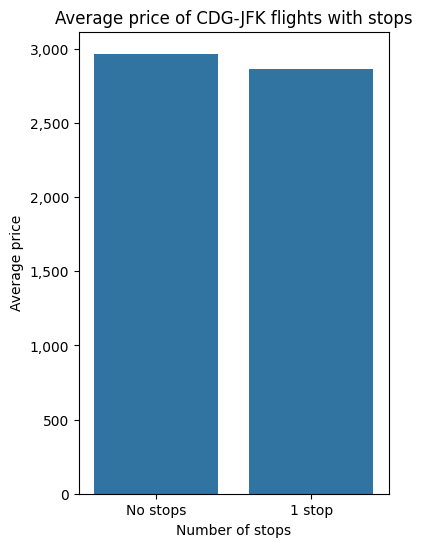

In [165]:
#Calculate average price for flights with no stops
average_price_no_stops = filtered_df[filtered_df['STOPS'] == 0]['PRICE'].mean()

#Calculate average price for flights with 1 stop
average_price_1_stop = filtered_df[filtered_df['STOPS'] == 1]['PRICE'].mean()



#Plot a graph to show the average price for flights 
plt.figure(figsize=(4, 6))
sns.barplot(x=['No stops', '1 stop'], y=[average_price_no_stops, average_price_1_stop])
plt.title('Average price of CDG-JFK flights with stops')
plt.xlabel('Number of stops')
plt.ylabel('Average price') 
formatter = FuncFormatter(lambda x, _: format(int(x), ','))
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()  

## the average price between a non-stop and 1 stop flight in peak seasons

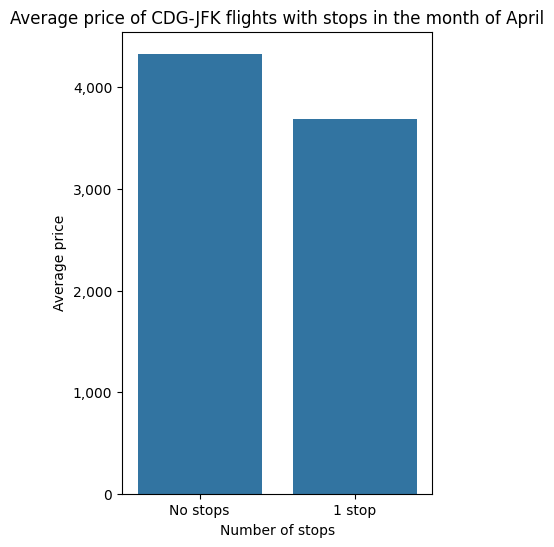

In [175]:
#filer the dataframe to limit it to flights departing in Mid April to end April
filtered_df = df[(df['DEPARTURE_DATETIME'] >= '2024-04-15 00:00:00') & (df['DEPARTURE_DATETIME'] <= '2024-04-30 23:59:59')]

#Calculate the average price of flights in the filtered dataframe, grouped by no stops and 1 stop
average_price_no_stops = filtered_df[filtered_df['STOPS'] == 0]['PRICE'].mean()
average_price_1_stop = filtered_df[filtered_df['STOPS'] == 1]['PRICE'].mean()

#Plot a graph to show the average price for flights 
plt.figure(figsize=(4, 6))
sns.barplot(x=['No stops', '1 stop'], y=[average_price_no_stops, average_price_1_stop])
plt.title('Average price of CDG-JFK flights with stops in the month of April')
plt.xlabel('Number of stops')
plt.ylabel('Average price') 
formatter = FuncFormatter(lambda x, _: format(int(x), ','))
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

## departure time and prices, ex-JFK

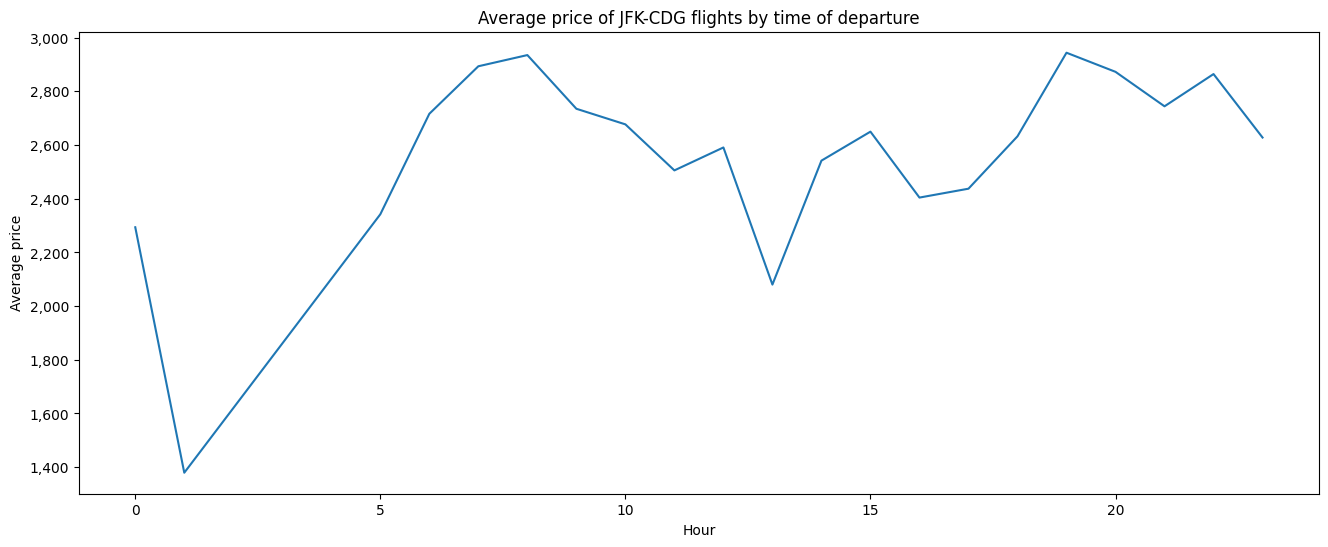

In [166]:
# Calculate the average price of flights departing from JFK at each hour
average_prices_by_hour =filtered_df[filtered_df['DEPATURE_CITY'] == 'JFK'].groupby(filtered_df['DEPARTURE_DATETIME'].dt.hour)['PRICE'].mean().reset_index()
average_prices_by_hour.rename(columns={'DEPARTURE_DATETIME': 'DEPARTURE_HOUR'}, inplace=True)  # Rename the column

# Plot a graph to show the average price of flights departing from JFK at each hour
plt.figure(figsize=(16, 6))
sns.lineplot(data=average_prices_by_hour, x='DEPARTURE_HOUR', y='PRICE', markers=True)
plt.title('Average price of JFK-CDG flights by time of departure')
plt.xlabel('Hour')
plt.ylabel('Average price')
formatter = FuncFormatter(lambda x, _: format(int(x), ','))
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()



## departure time and prices, ex-CDG

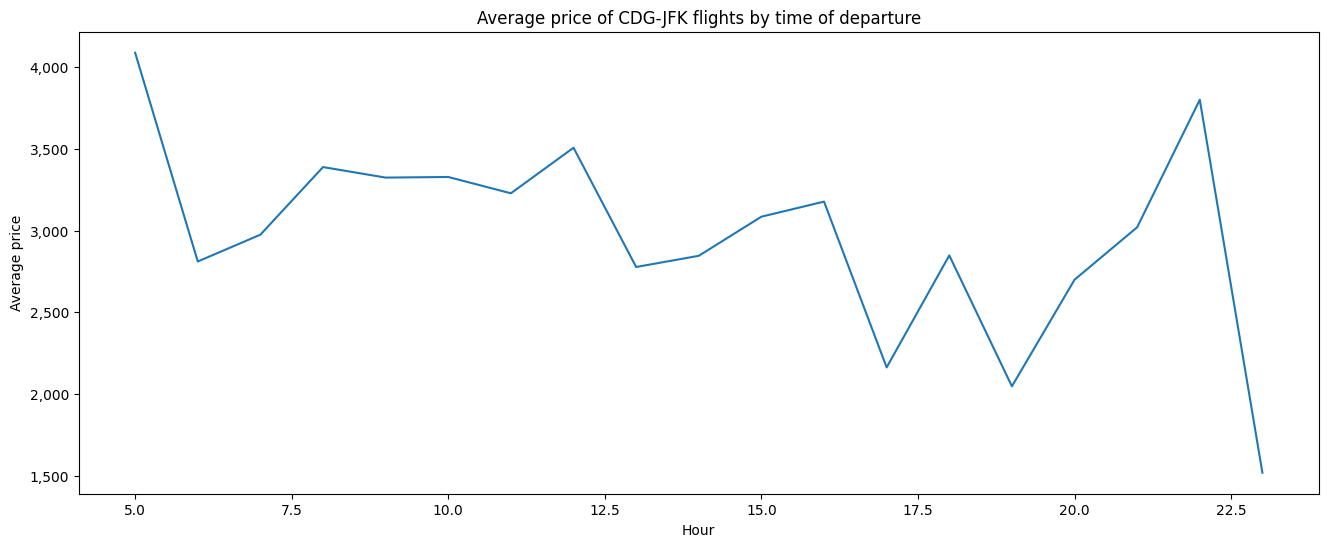

In [167]:
# Calculate the average price of flights departing from CDG at each hour
average_prices_by_hour =filtered_df[filtered_df['DEPATURE_CITY'] == 'CDG'].groupby(filtered_df['DEPARTURE_DATETIME'].dt.hour)['PRICE'].mean().reset_index()
average_prices_by_hour.rename(columns={'DEPARTURE_DATETIME': 'DEPARTURE_HOUR'}, inplace=True)  # Rename the column

# Plot a graph to show the average price of flights departing from CDG at each hour
plt.figure(figsize=(16, 6))
sns.lineplot(data=average_prices_by_hour, x='DEPARTURE_HOUR', y='PRICE', markers=True)
plt.title('Average price of CDG-JFK flights by time of departure')
plt.xlabel('Hour')
plt.ylabel('Average price')
formatter = FuncFormatter(lambda x, _: format(int(x), ','))
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

# Average prices by day of week  

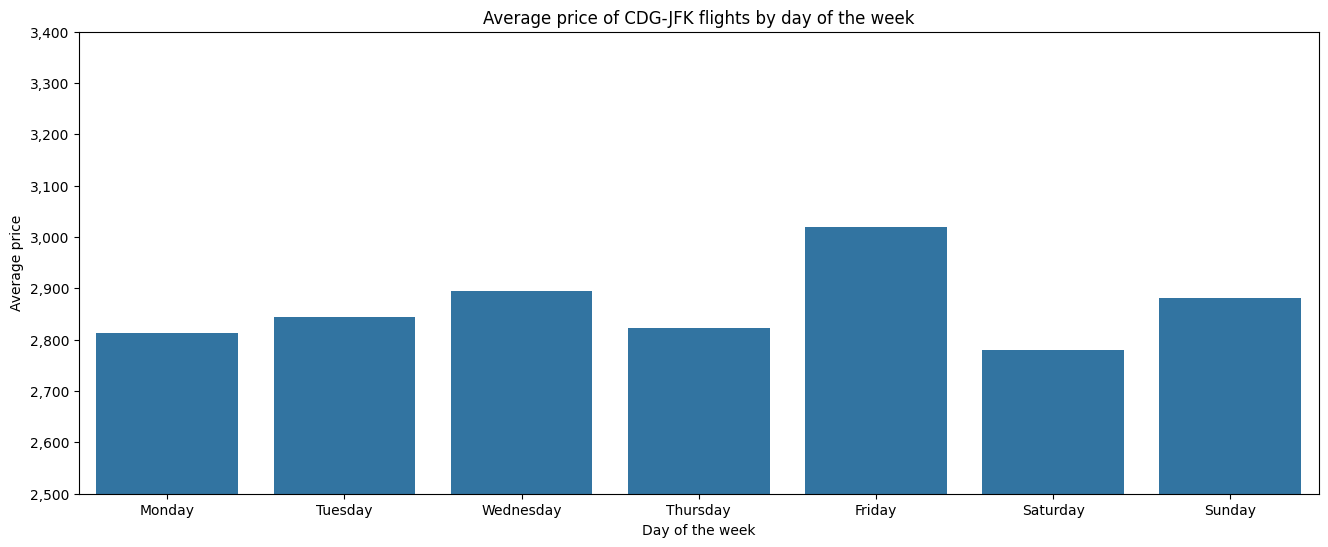

In [173]:
#Calculate the average flight price each day of the week 
average_prices_by_day = filtered_df.groupby(filtered_df['DEPARTURE_DATETIME'].dt.dayofweek)['PRICE'].mean().reset_index()

#Rename the values of day of week
average_prices_by_day['DEPARTURE_DATETIME'] = average_prices_by_day['DEPARTURE_DATETIME'].replace({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

#Plot a bar chart to show the average flight price each day of the week 
plt.figure(figsize=(16, 6))
sns.barplot(data=average_prices_by_day, x='DEPARTURE_DATETIME', y='PRICE')
plt.title('Average price of CDG-JFK flights by day of the week')
plt.xlabel('Day of the week')   
plt.ylabel('Average price')

#change range of y-axis to begin from 2500
plt.ylim(2500, 3400) 

#rename the x axis labels to days of week
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

formatter = FuncFormatter(lambda x, _: format(int(x), ',')) 
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()